In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import pickle as pk

from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

from sklearn.metrics import f1_score

import seaborn as sns

In [62]:
num=4

In [63]:
data_train = pd.read_csv('data/data_train_full.csv', index_col=[0])
data_train.head(3)

,customer_id,total_revenue,average_revenue,count,sauces,main_food,snacks,cold_drinks,hot_drinks,alco,...,churn_rate_mean,churn_rate_std,favourite_outlet_id,favourite_churn_rate,day_diff_1,day_diff_2,day_diff_mean,day_diff_std,buy_post,date_diff_post
0,29891,5087.35,203.494,25,0.12,0.68,0.28,0.2,0.04,0.0,...,0.805103,0.000515,384,0.804954,69117.0,3277.0,35680.041667,27886.883065,1,9.0
1,30477,5675.60,227.024,25,0.44,0.68,0.68,0.2,0.32,0.0,...,0.798152,0.000000,321,0.798152,81408.0,70296.0,50319.833333,34380.524421,1,10.0
2,44491,514.90,128.725,4,0.25,0.25,0.25,0.0,0.00,0.0,...,0.821527,0.001253,508,0.820901,74503.0,71628.0,53026.333333,45237.435574,1,42.0


In [64]:
data_valid = pd.read_csv('data/data_valid_full.csv', index_col=[0])
data_valid.head(3)

,customer_id,total_revenue,average_revenue,count,sauces,main_food,snacks,cold_drinks,hot_drinks,alco,...,churn_rate_mean,churn_rate_std,favourite_outlet_id,favourite_churn_rate,day_diff_1,day_diff_2,day_diff_mean,day_diff_std,buy_post,date_diff_post
0,45006,1567.84,522.613333,3,0.333333,1.666667,2.000000,1.333333,0.333333,0.0,...,0.789930,0.019053,149,0.769391,84455.0,59379.0,72889.500000,16356.086956,0,NaN
1,45067,7561.40,164.378261,46,0.000000,0.652174,0.608696,0.152174,0.913043,0.0,...,0.806065,0.031809,172,0.777151,66211.0,75094.0,28759.355556,30316.384504,1,4.0
2,45321,569.96,142.490000,4,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,...,0.780506,0.000404,193,0.780304,1453.0,629.0,57174.666667,48259.405740,1,39.0


In [65]:
data_test = pd.read_csv('data/data_test_full.csv', index_col=[0])
data_test.head(3)

,customer_id,total_revenue,average_revenue,count,sauces,main_food,snacks,cold_drinks,hot_drinks,alco,...,churn_rate_mean,churn_rate_std,favourite_outlet_id,favourite_churn_rate,day_diff_1,day_diff_2,day_diff_mean,day_diff_std,buy_post,date_diff_post
0,31426,9393.59,391.399583,24,1.500000,0.916667,0.875,0.083333,0.000000,0.0,...,0.797179,0.000000,305,0.797179,19397.0,20330.0,38319.304348,30118.504015,1,4.0
1,44939,1664.83,554.943333,3,2.333333,1.000000,3.000,1.000000,0.666667,0.0,...,0.837751,0.014255,643,0.845982,22972.0,38684.0,19342.000000,5133.595231,1,9.0
2,45404,2317.90,772.633333,3,0.333333,1.666667,4.000,1.666667,0.000000,0.0,...,0.795320,0.002997,280,0.793590,50994.0,6364.0,46382.000000,6522.352950,1,18.0


In [66]:
data_submit = pd.read_csv('data/data_submit_full.csv', index_col=[0])
data_submit.head(3)

,customer_id,total_revenue,average_revenue,count,sauces,main_food,snacks,cold_drinks,hot_drinks,alco,desert,ownareaall_sqm_mean,churn_rate_mean,churn_rate_std,favourite_outlet_id,favourite_churn_rate,day_diff_1,day_diff_2,day_diff_mean,day_diff_std
0,52341,2255.77,563.942500,4,1.000000,1.000000,2.000000,0.750000,1.000000,0.0,1.250000,338.900000,0.813594,0.000000,448,0.813594,2614.0,6315.0,30814.000000,47905.546328
1,69175,3872.76,430.306667,9,1.000000,1.666667,1.222222,1.000000,0.000000,0.0,0.000000,255.066667,0.819738,0.014241,440,0.812561,21908.0,22493.0,31461.000000,27735.756298
2,73427,7881.45,254.240323,31,0.451613,0.741935,0.612903,0.354839,0.032258,0.0,0.064516,177.040645,0.803660,0.017245,324,0.798610,73063.0,44965.0,36877.433333,30565.998453


In [67]:
train = data_train
valid = data_valid
test = data_test

In [68]:
train.columns

Index(['customer_id', 'total_revenue', 'average_revenue', 'count', 'sauces',
       'main_food', 'snacks', 'cold_drinks', 'hot_drinks', 'alco', 'desert',
       'ownareaall_sqm_mean', 'churn_rate_mean', 'churn_rate_std',
       'favourite_outlet_id', 'favourite_churn_rate', 'day_diff_1',
       'day_diff_2', 'day_diff_mean', 'day_diff_std', 'buy_post',
       'date_diff_post'],
      dtype='object')

In [69]:
train_columns = ['customer_id', 'total_revenue', 'average_revenue', 'count', 'sauces',
       'snacks', 'cold_drinks', 'hot_drinks', 'alco',
       'ownareaall_sqm_mean', 'churn_rate_mean', 'churn_rate_std',
       'favourite_outlet_id', 'favourite_churn_rate', 'day_diff_1',
       'day_diff_2', 'day_diff_mean']

In [70]:
cat_features = []

In [71]:
X_train = train[train_columns]
y_train = train['buy_post']

In [72]:
X_valid = valid[train_columns]
y_valid = valid['buy_post']

In [73]:
X_test = test[train_columns]
y_test = test['buy_post']

In [74]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] * repeat + [features_ones] )
    target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 2)

y_train_upsampled.value_counts() / y_train_upsampled.shape[0]

1    0.560465
0    0.439535
Name: buy_post, dtype: float64

### Классификация

In [75]:
clf = CatBoostClassifier(random_seed=666, iterations=2000, eval_metric='F1')

clf.fit(
    X_train_upsampled, y_train_upsampled,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid),
    verbose=False,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [92]:
predicted_valid = clf.predict(X_valid)
f1_score_valid = f1_score(y_valid, predicted_valid)
probabilities_upsampled = clf.predict_proba(X_valid)[:, 1]

print('F1:', f1_score_valid)
print('ROC-AUC:', roc_auc_score(y_valid, probabilities_upsampled))

F1: 0.7523353062751403
ROC-AUC: 0.6972717420223766


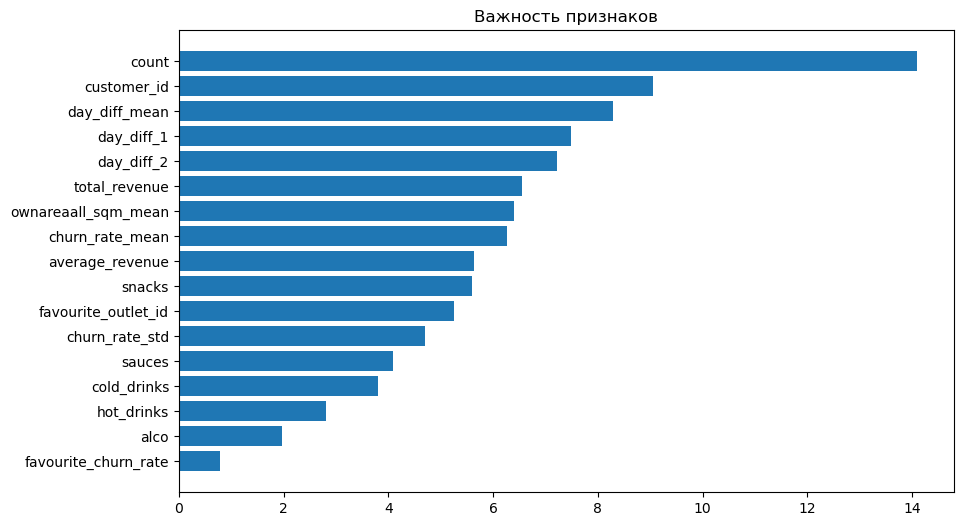

In [93]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Важность признаков');

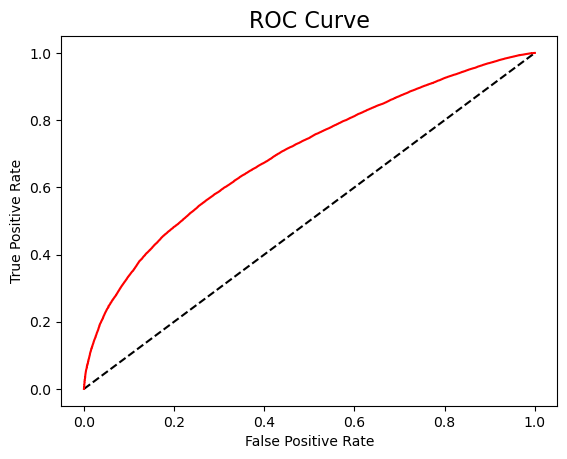

In [78]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_valid, clf.predict_proba(X_valid)[:, 1])
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.show();

In [79]:
predicted_test = clf.predict(X_test)
print('F1:', f1_score(y_test, predicted_test))

F1: 0.7520846767917103


In [80]:
X_submit = data_submit[train_columns]
predicted_submit = clf.predict(X_submit)

In [81]:
data_submit['buy_post'] = predicted_submit

In [82]:
data_submit['buy_post'].mean()

0.5736375451777734

In [83]:
with open(f"cat_classifier{num}.pkl", "wb") as f:
            pk.dump(clf, f)

### Регрессия

In [84]:
train_reg = data_train.dropna()
valid_reg = data_valid.dropna()
test_reg = data_test.dropna()

In [85]:
X_train_reg = train_reg[train_columns]
y_train_reg = train_reg['date_diff_post']

X_valid_reg = valid_reg[train_columns]
y_valid_reg = valid_reg['date_diff_post']

X_test_reg = test_reg[train_columns]
y_test_reg = test_reg['date_diff_post']

In [86]:
reg = CatBoostRegressor(
    random_seed=666,
    iterations=50, 
    max_depth=4
)

reg.fit(
    X_train_reg, y_train_reg,
    cat_features=cat_features,
    eval_set=(X_valid_reg, y_valid_reg),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [87]:
best_predict = reg.predict(X_test_reg)
mean_squared_error(y_test_reg, best_predict) ** 0.5

14.328497739144975

In [88]:
submit_predict = reg.predict(X_submit)
data_submit['date_diff_post'] = submit_predict

In [89]:
result = data_submit[['customer_id', 'date_diff_post', 'buy_post']]
result.to_csv('result.csv', sep=';')

In [90]:
with open(f"cat_regression{num}.pkl", "wb") as f:
            pk.dump(reg, f)

In [91]:
num+=1